<a href="https://colab.research.google.com/github/RileyWClarke/BiancoGroup/blob/master/Notebooks/fftfilter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


#Potentially useful astropy stuff
import astropy
import astropy.io.ascii as ascii
from astropy.table import Table
from astropy.io import fits
from astropy.stats import LombScargle
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip
from astropy.modeling import powerlaws
from astropy import constants as const
from astropy import units as u

#For reading in and organizing data
import pandas as pd
import requests
import json

#Misc
import scipy
from scipy import stats
from scipy.optimize import curve_fit
from collections import Counter
import itertools


#Making Figures look nice
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18

In [0]:
filenames = []

for i in range(1000):
    if i<10:
        filenames.append('https://archive.stsci.edu/missions/k2/lightcurves/c3/206100000/35000/ktwo20613500'
                         +str(i)+'-c03_llc.fits')
    elif i<100:
        filenames.append('https://archive.stsci.edu/missions/k2/lightcurves/c3/206100000/35000/ktwo2061350'
                         +str(i)+'-c03_llc.fits')
    else:
        filenames.append('https://archive.stsci.edu/missions/k2/lightcurves/c3/206100000/35000/ktwo206135'
                         +str(i)+'-c03_llc.fits')

In [4]:
#Read in arrays via astropy.fits.open
d = {}
for j, filename in enumerate(filenames):
    try:
        with fits.open(filename, mode="readonly") as hdulist:
            d["k2bjds{0}".format(j)] = hdulist[1].data['TIME'] 
            d["pdcsap_flux{0}".format(j)] = hdulist[1].data['PDCSAP_FLUX']
            d["pdcsap_flux_err{0}".format(j)] = hdulist[1].data['PDCSAP_FLUX_ERR']
    except: 
        print('no file for loop '+str(j))

no file for loop 0
no file for loop 1
no file for loop 2
no file for loop 3
no file for loop 4
no file for loop 5
no file for loop 6
no file for loop 7
no file for loop 8
no file for loop 9
no file for loop 10
no file for loop 12
no file for loop 13
no file for loop 14
no file for loop 15
no file for loop 16
no file for loop 17
no file for loop 18
no file for loop 19
no file for loop 20
no file for loop 21
no file for loop 22
no file for loop 23
no file for loop 24
no file for loop 25
no file for loop 26
no file for loop 27
no file for loop 28
no file for loop 29
no file for loop 30
no file for loop 31
no file for loop 33
no file for loop 34
no file for loop 35
no file for loop 36
no file for loop 37
no file for loop 38
no file for loop 39
no file for loop 40
no file for loop 41
no file for loop 42
no file for loop 43
no file for loop 44
no file for loop 45
no file for loop 46
no file for loop 47
no file for loop 48
no file for loop 49
no file for loop 50
no file for loop 51
no file fo

In [20]:
d

{'k2bjds11': array([2144.10322285, 2144.12365529, 2144.14408753, ..., 2213.22381809,
        2213.24424969, 2213.26468129]),
 'k2bjds129': array([2144.10275376, 2144.123186  , 2144.14361805, ..., 2213.22314985,
        2213.24358154, 2213.26401323]),
 'k2bjds130': array([2144.10312752, 2144.12355991, 2144.14399211, ..., 2213.22366885,
        2213.24410047, 2213.26453209]),
 'k2bjds170': array([2144.10275121, 2144.12318346, 2144.14361551, ..., 2213.22314659,
        2213.24357828, 2213.26400997]),
 'k2bjds222': array([2144.10279773, 2144.12323   , 2144.14366206, ..., 2213.22320685,
        2213.24363853, 2213.26407022]),
 'k2bjds257': array([2144.10291709, 2144.1233494 , 2144.14378151, ..., 2213.2233699 ,
        2213.24380156, 2213.26423321]),
 'k2bjds267': array([2144.10293541, 2144.12336773, 2144.14379985, ..., 2213.22339537,
        2213.24382702, 2213.26425867]),
 'k2bjds314': array([2144.10313125, 2144.12356365, 2144.14399584, ..., 2213.22367454,
        2213.24410615, 2213.26453

In [6]:
#How many objects did we grab total?
len(d)/3

46.0

In [21]:
for filename in d:
  print(filename)

k2bjds11
pdcsap_flux11
pdcsap_flux_err11
k2bjds32
pdcsap_flux32
pdcsap_flux_err32
k2bjds61
pdcsap_flux61
pdcsap_flux_err61
k2bjds75
pdcsap_flux75
pdcsap_flux_err75
k2bjds83
pdcsap_flux83
pdcsap_flux_err83
k2bjds129
pdcsap_flux129
pdcsap_flux_err129
k2bjds130
pdcsap_flux130
pdcsap_flux_err130
k2bjds170
pdcsap_flux170
pdcsap_flux_err170
k2bjds222
pdcsap_flux222
pdcsap_flux_err222
k2bjds257
pdcsap_flux257
pdcsap_flux_err257
k2bjds267
pdcsap_flux267
pdcsap_flux_err267
k2bjds314
pdcsap_flux314
pdcsap_flux_err314
k2bjds325
pdcsap_flux325
pdcsap_flux_err325
k2bjds331
pdcsap_flux331
pdcsap_flux_err331
k2bjds335
pdcsap_flux335
pdcsap_flux_err335
k2bjds364
pdcsap_flux364
pdcsap_flux_err364
k2bjds369
pdcsap_flux369
pdcsap_flux_err369
k2bjds380
pdcsap_flux380
pdcsap_flux_err380
k2bjds415
pdcsap_flux415
pdcsap_flux_err415
k2bjds422
pdcsap_flux422
pdcsap_flux_err422
k2bjds464
pdcsap_flux464
pdcsap_flux_err464
k2bjds484
pdcsap_flux484
pdcsap_flux_err484
k2bjds486
pdcsap_flux486
pdcsap_flux_err486
k2b

In [0]:
nanseries = []
for filename in d:
  nanseries.append(d[filename])

In [53]:
#removing nans from arrays
allseries = []
for i in range(len(nanseries)-2)[::3]:
  allseries.append(nanseries[i][np.where((np.isnan(nanseries[i]) == False) & (np.isnan(nanseries[i+1]) == False))[0]][:500])
  allseries.append(nanseries[i+1][(~np.isnan(nanseries[i+1])) & (~np.isnan(nanseries[i]))][:500])
  allseries.append(nanseries[i+2][np.where(np.isnan(nanseries[i+2]) == False)[0]][:500])

0
3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135


[array([2144.12365529, 2144.14408753, 2144.16451997, 2144.1849523 ,
        2144.20538454, 2144.22581697, 2144.24624931, 2144.26668164,
        2144.28711397, 2144.3075463 , 2144.32797864, 2144.34841107,
        2144.3688433 , 2144.38927573, 2144.40970806, 2144.43014029,
        2144.45057272, 2144.47100505, 2144.49143727, 2144.5118697 ,
        2144.53230193, 2144.55273425, 2144.57316668, 2144.5935989 ,
        2144.61403133, 2144.63446365, 2144.65489587, 2144.67532829,
        2144.69576062, 2144.71619294, 2144.73662526, 2144.75705758,
        2144.79792222, 2144.81835453, 2144.83878685, 2144.85921927,
        2144.87965149, 2144.9000839 , 2144.92051622, 2144.94094843,
        2144.96138085, 2144.98181316, 2145.00224537, 2145.02267779,
        2145.0431101 , 2145.06354231, 2145.08397472, 2145.10440703,
        2145.12483924, 2145.14527165, 2145.16570396, 2145.18613627,
        2145.20656858, 2145.22700088, 2145.24743319, 2145.26786549,
        2145.2882978 , 2145.30873011, 2145.32916

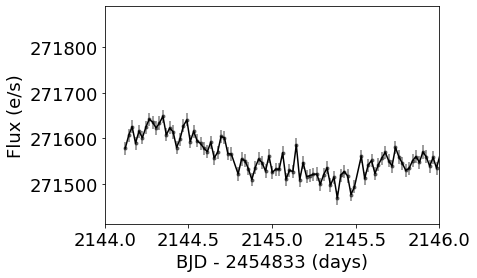

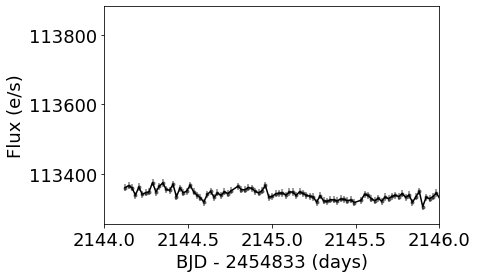

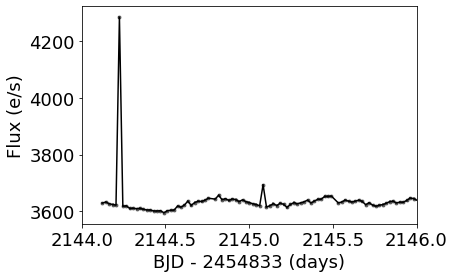

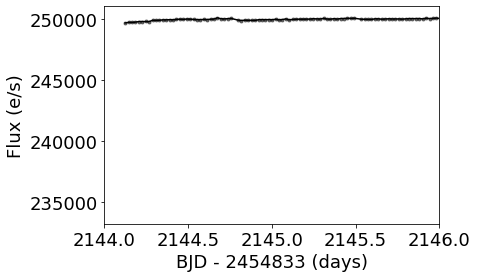

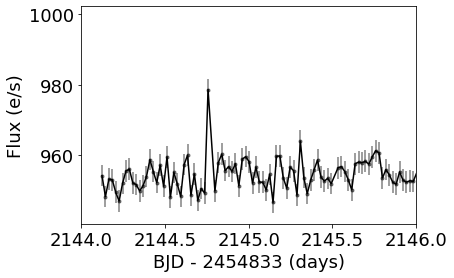

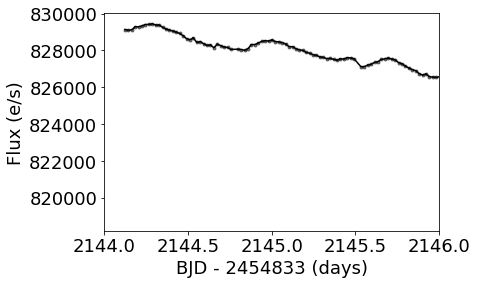

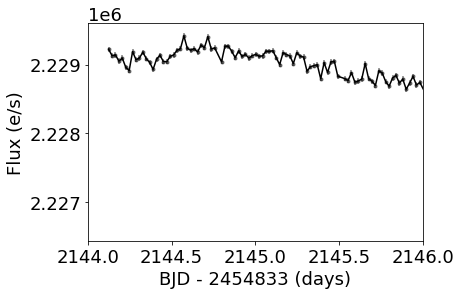

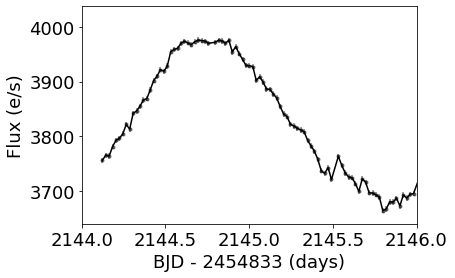

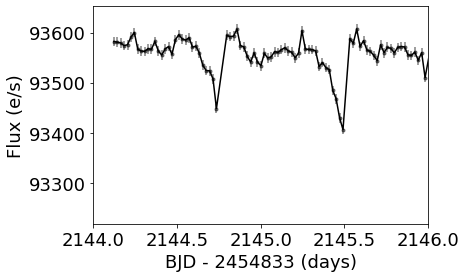

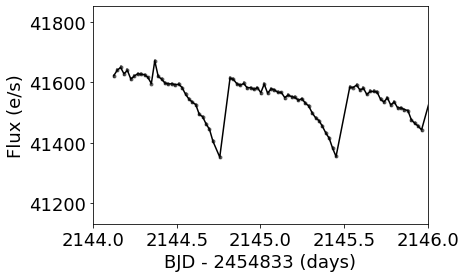

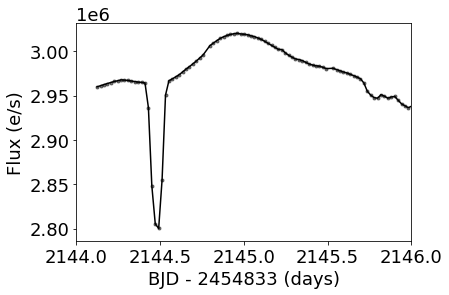

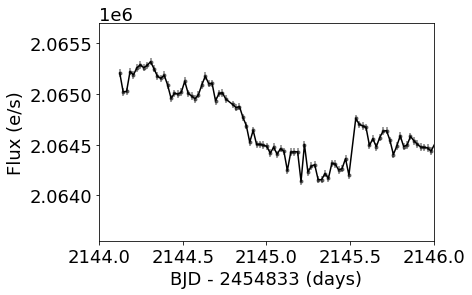

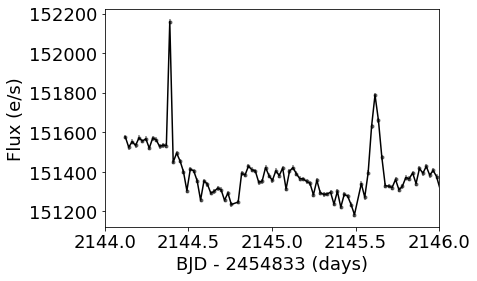

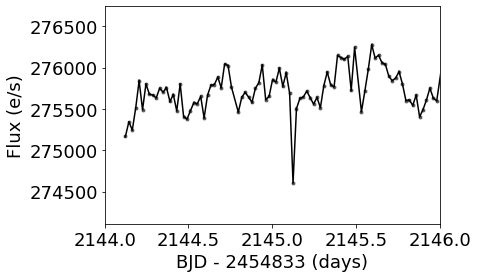

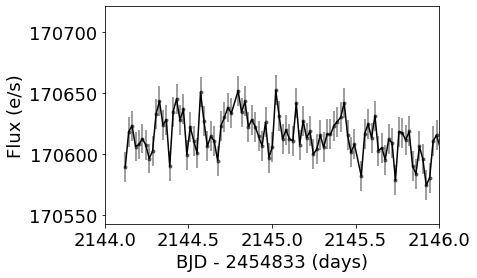

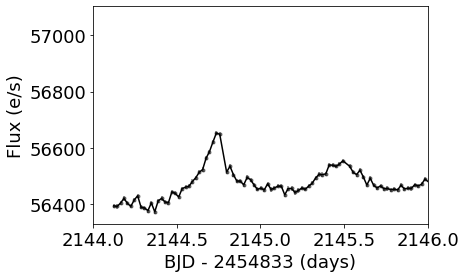

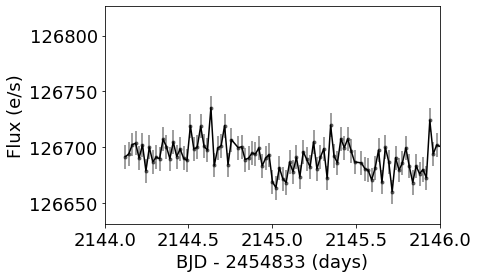

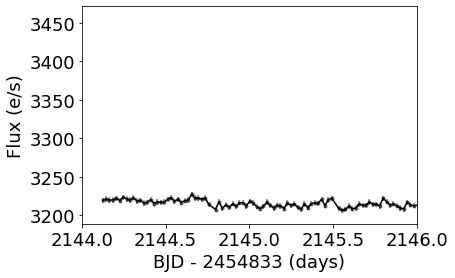

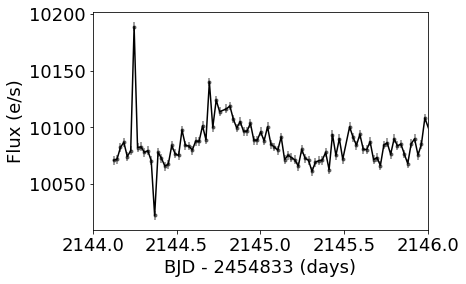

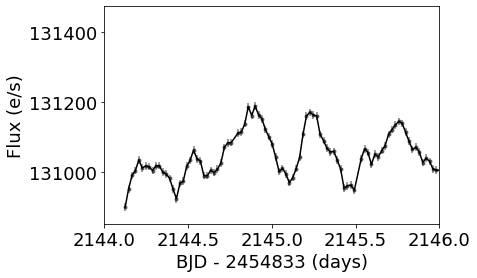

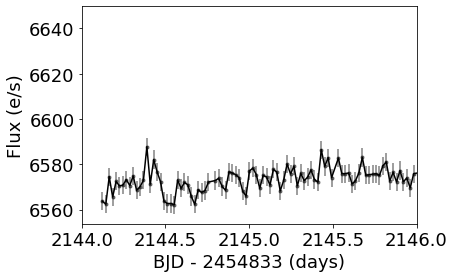

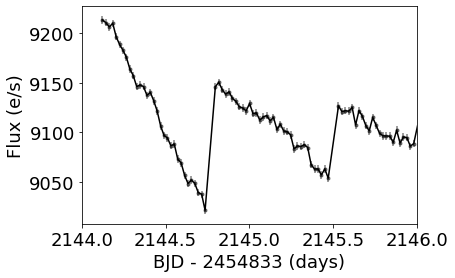

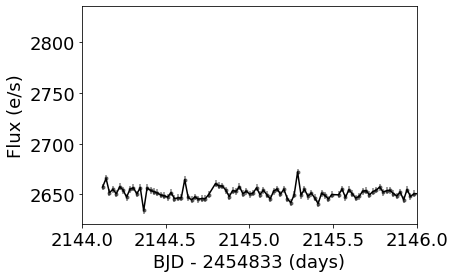

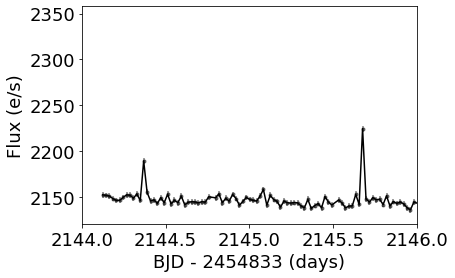

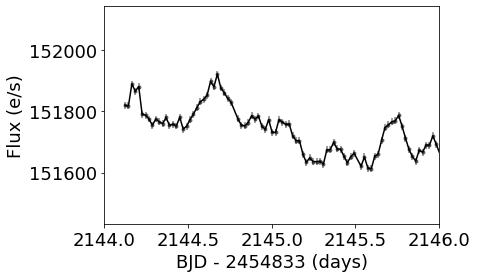

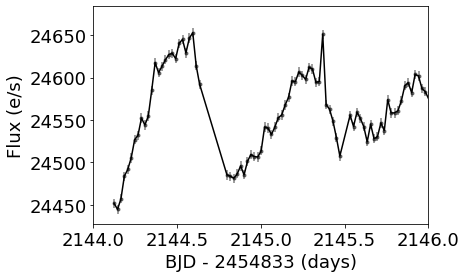

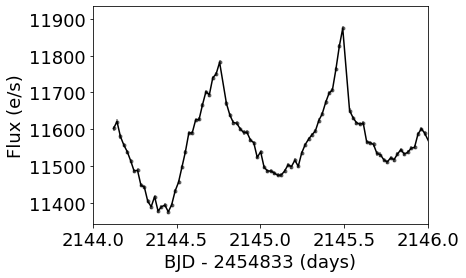

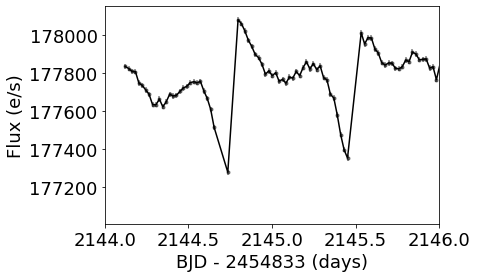

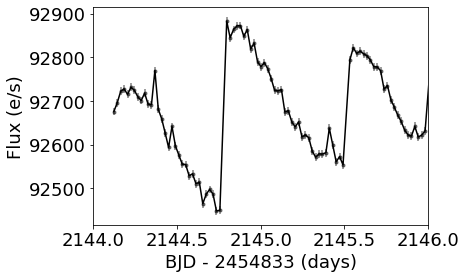

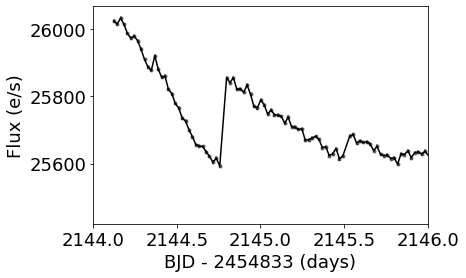

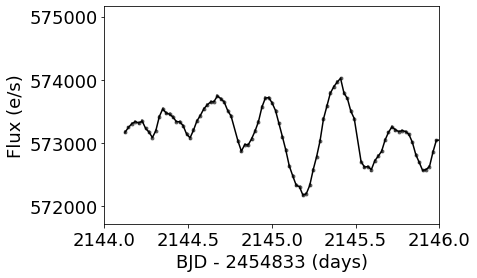

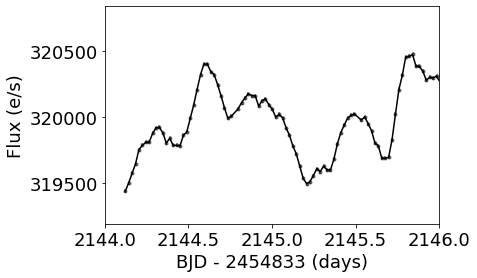

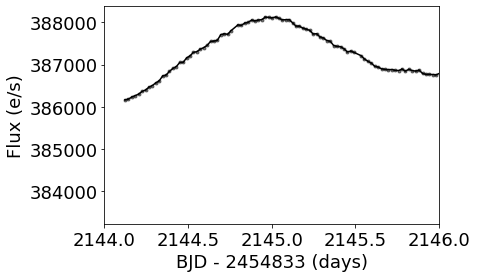

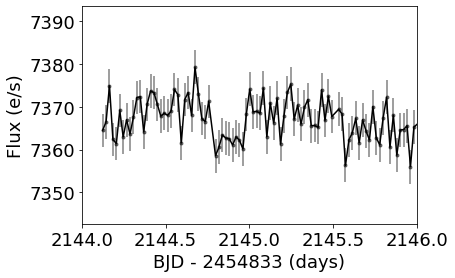

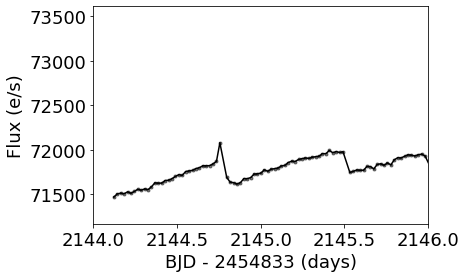

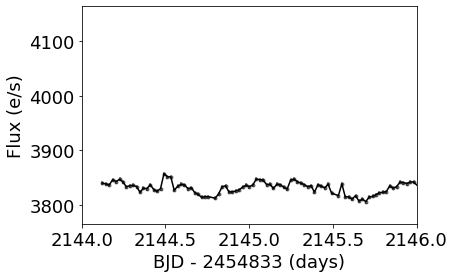

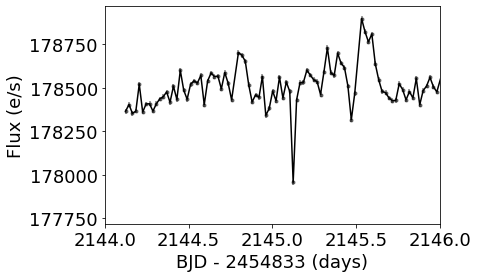

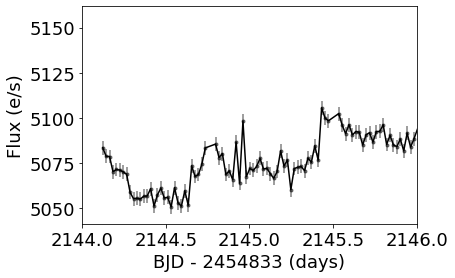

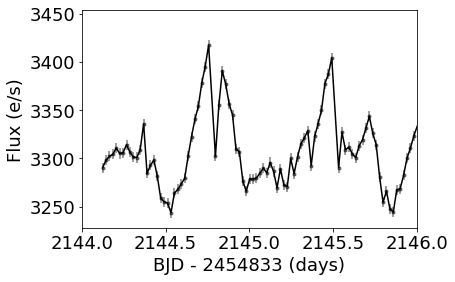

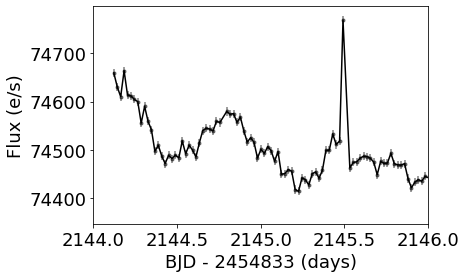

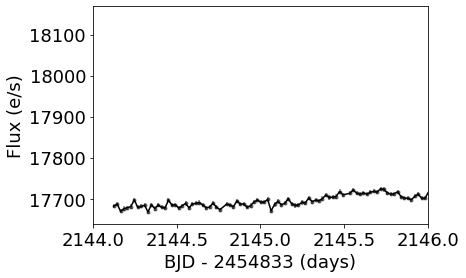

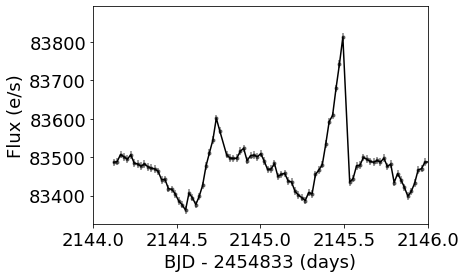

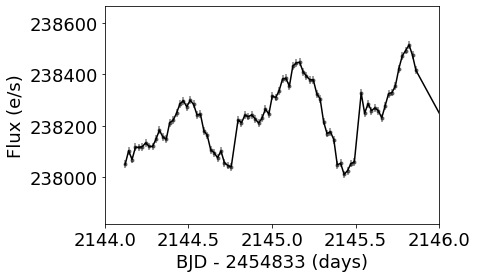

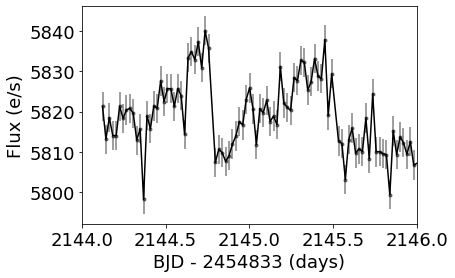

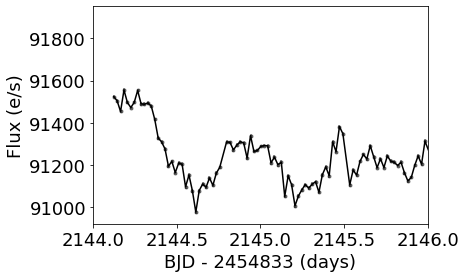

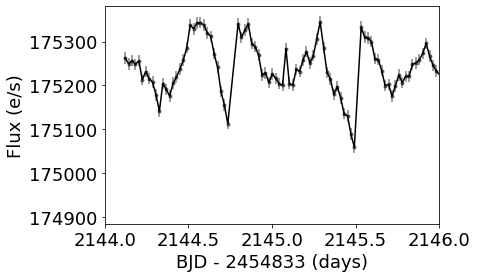

In [59]:
for i in range(len(allseries)-2)[::3]:
  plt.errorbar(allseries[i], allseries[i+1], yerr=allseries[i+2], fmt='k.',alpha=0.5)
  plt.plot(allseries[i], allseries[i+1], c='k')
  plt.xlim(2144,2146)
  plt.ylabel("Flux (e/s)")
  plt.xlabel("BJD - 2454833 (days)")
  plt.show()